# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
#genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu'))['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/gNNpgpo6gATjuxTE7CCp.h5ad')
adata = sc.read_h5ad('../data/gNNpgpo6gATjuxTE7CCp.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 51370 × 23149
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_ids', 'biotype

In [4]:
CELLTYPES = [
"retinal rod cell",
"Mueller cell",
"amacrine cell",
"ON-bipolar cell",
"rod bipolar cell",
"retinal cone cell",
"retina horizontal cell",
"retinal ganglion cell",
"astrocyte",
"microglial cell",
]

In [5]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
celltype = CELLTYPES[0]
to_use = adata.uns["rank_genes_groups"]["names"][celltype][
    : NUM_GENES
].tolist()
subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(to_use)]
genie_grn = compute_genie3(
    subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 11.56 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 11.34 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


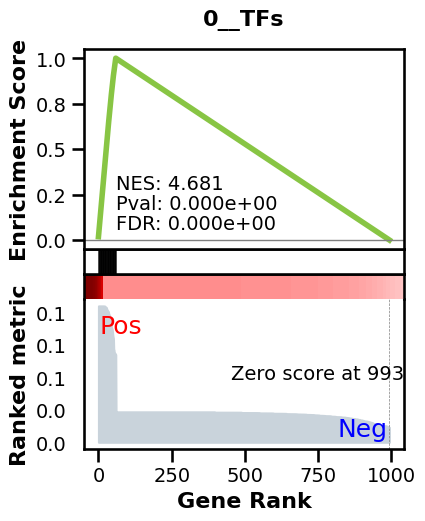

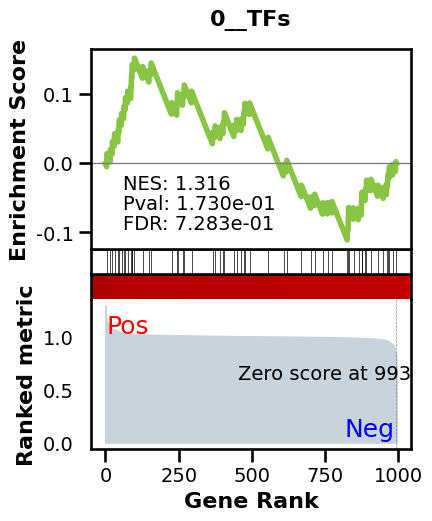

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 630 genes
intersection pct: 0.6338028169014085
precision:  0.005248157931322119 
recall:  0.4967105263157895 
random precision: 0.0007671537083301789



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 1999.32it/s]

Average Precision (AP):  0.005998196103599925
Area Under Precision-Recall Curve (AUPRC):  0.005122339444056498
EPR: 22.128779320141835


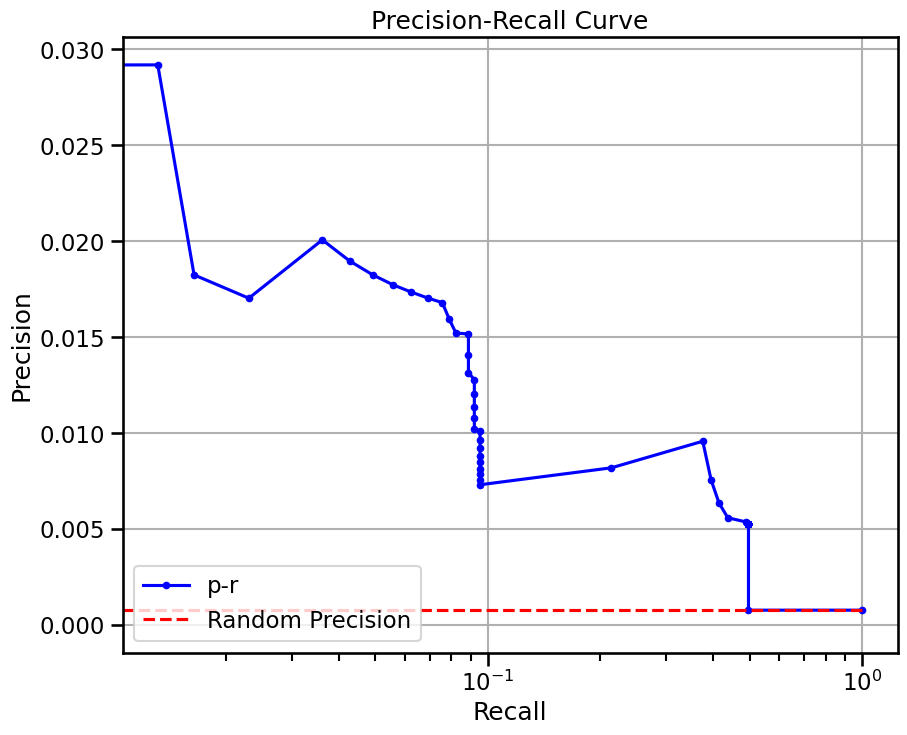

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 32.83 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


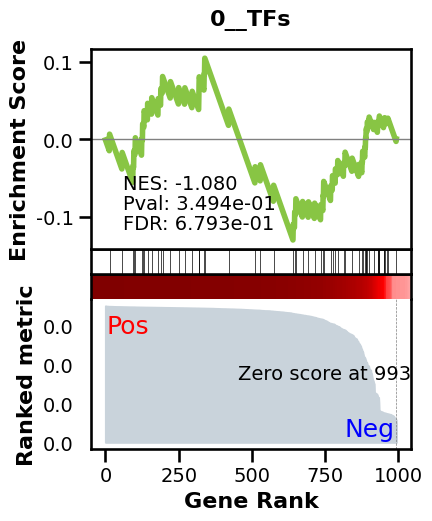

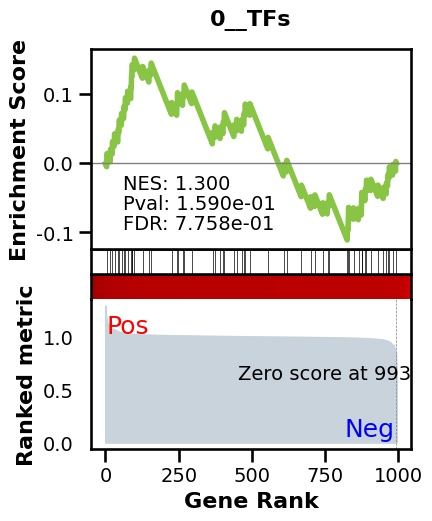

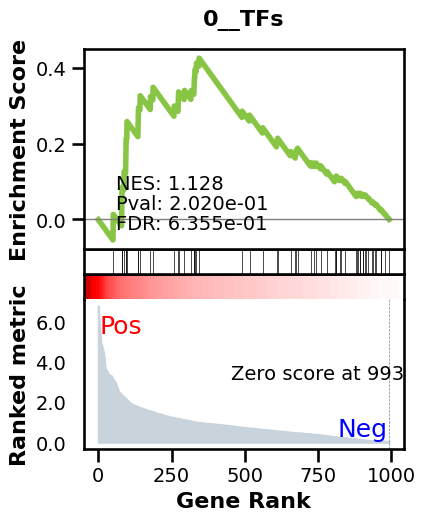

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 630 genes
intersection pct: 0.6338028169014085
precision:  0.0007532323628463468 
recall:  0.7960526315789473 
random precision: 0.0007671537083301789



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2083.00it/s]

Average Precision (AP):  0.001359239702244522
Area Under Precision-Recall Curve (AUPRC):  0.0012723371246811412
EPR: 13.101345459763138


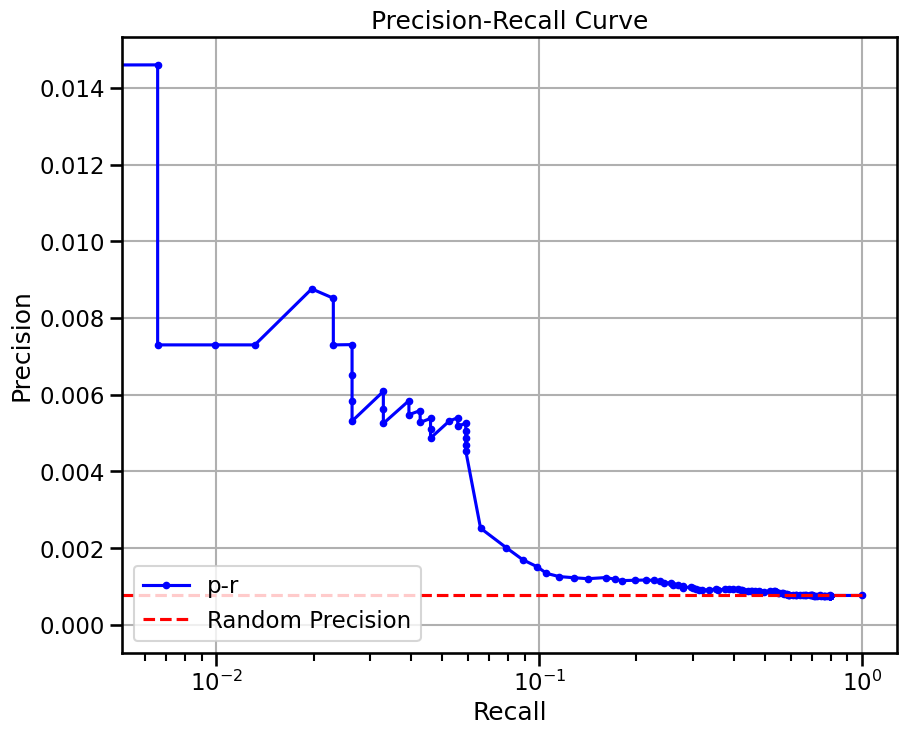

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 126.16 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


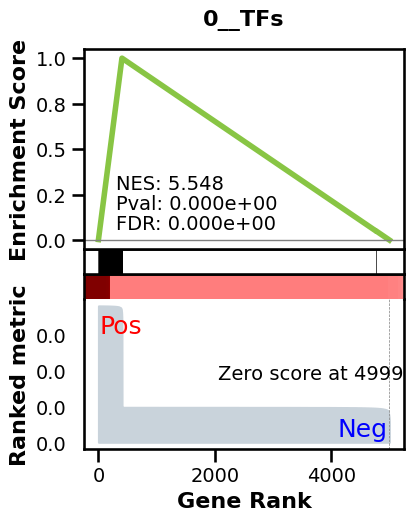

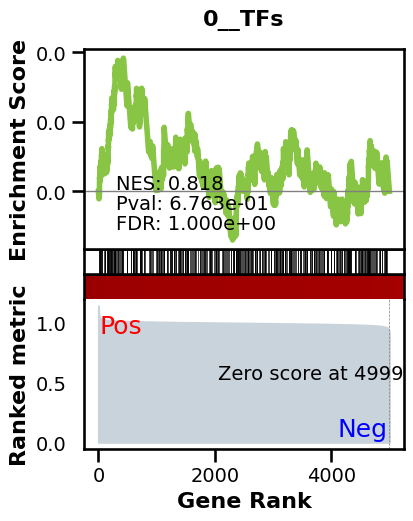

_________________________________________
TF specific enrichment


found some significant results for  1.7241379310344827 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3634 genes
intersection pct: 0.7268
precision:  0.006042865477227617 
recall:  0.42516782216353033 
random precision: 0.001376576029580251



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.05it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.01it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.01it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.04it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.04it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.02it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.03it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.04it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.04it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.00it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.01it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.02it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.03it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.05it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.03it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.02it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.03it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.02it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.00it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.00it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 42.85it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 42.91it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 42.95it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 42.95it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 42.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 42.98it/s]

Average Precision (AP):  0.004625268004707552
Area Under Precision-Recall Curve (AUPRC):  0.003959369525246398
EPR: 11.301529473030195


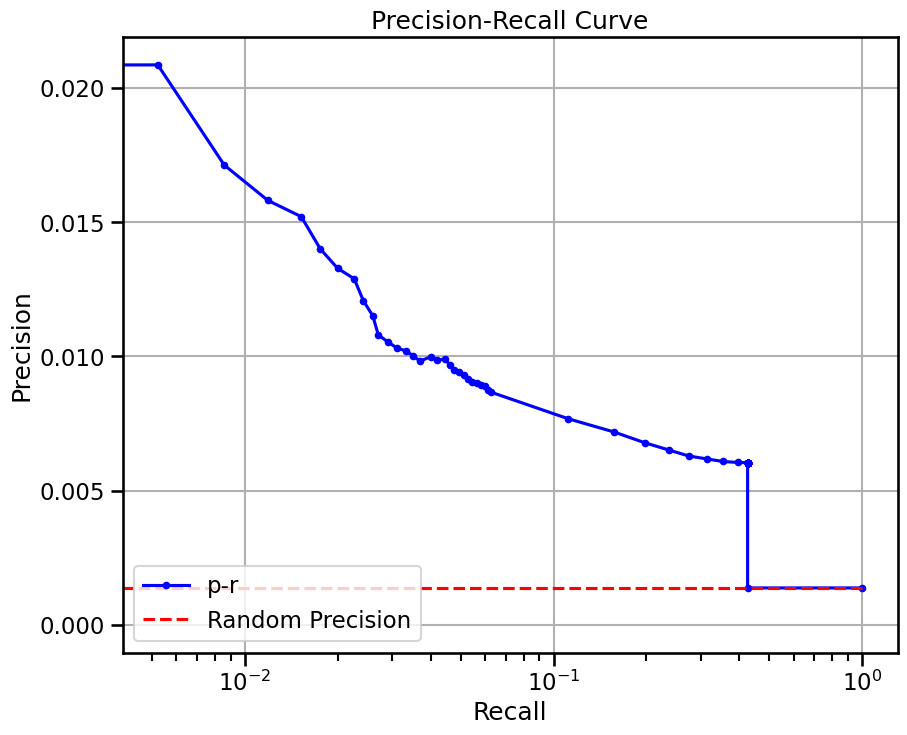

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 504.58 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


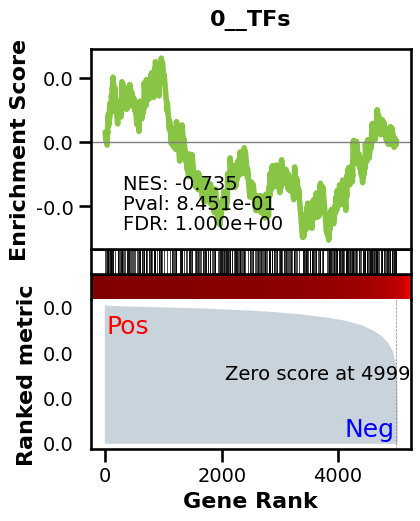

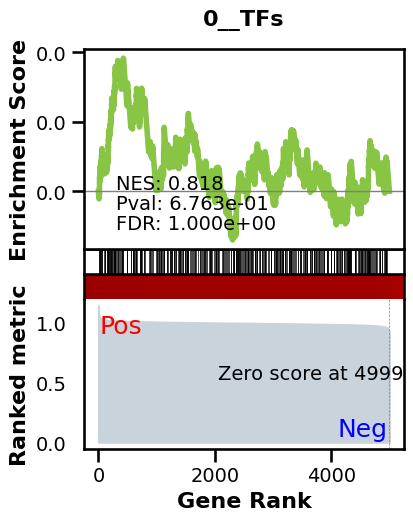

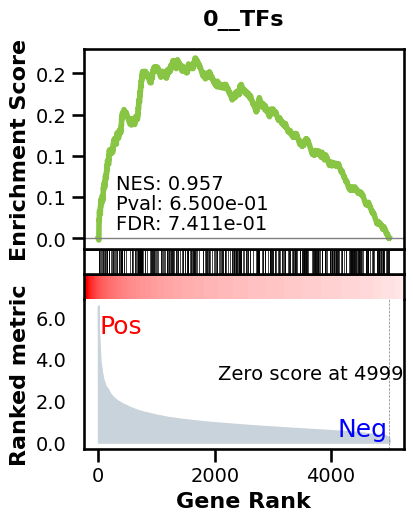

_________________________________________
TF specific enrichment


found some significant results for  6.896551724137931 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3634 genes
intersection pct: 0.7268
precision:  0.001418549781173575 
recall:  0.8439528997468911 
random precision: 0.001376576029580251



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.12it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.25it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.23it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.20it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.18it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.14it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.17it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.17it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.17it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.16it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.18it/s]


 47%|████▋     | 60/128 [00:01<00:01, 42.89it/s]


 51%|█████     | 65/128 [00:01<00:01, 42.96it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.04it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.04it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.05it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.07it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.07it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.10it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.08it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.08it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.10it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.09it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.10it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.10it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.09it/s]

Average Precision (AP):  0.0015747492738874226
Area Under Precision-Recall Curve (AUPRC):  0.0015464655608721349


EPR: 2.165370159203544


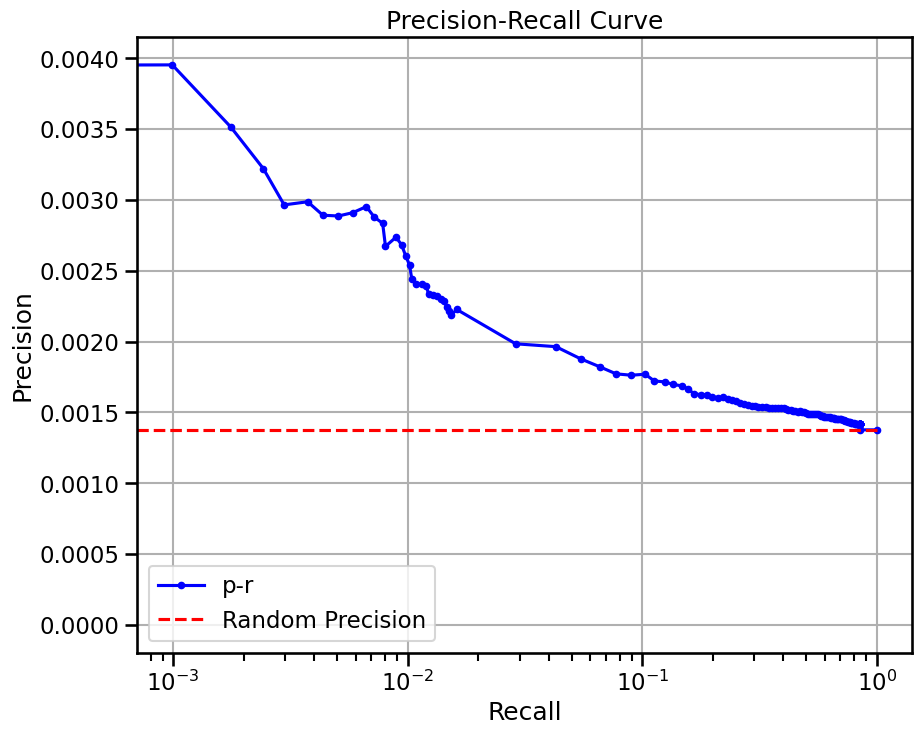

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 122.40 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


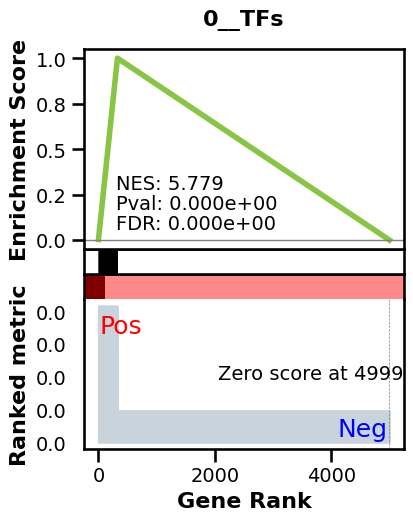

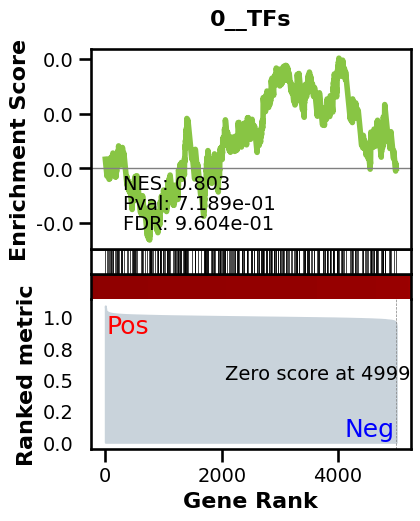

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3599 genes
intersection pct: 0.7198
precision:  0.0028950678374424833 
recall:  0.2765276339327747 
random precision: 0.0008202049825155249



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.58it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.26it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.50it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.51it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.69it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.71it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.75it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.76it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.72it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.71it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.79it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.84it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.81it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.79it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.84it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.84it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.76it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.73it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.80it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.80it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.80it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.77it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.79it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.81it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.73it/s]

Average Precision (AP):  0.001790848031384517
Area Under Precision-Recall Curve (AUPRC):  0.001558562596805306
EPR: 7.893858194843267


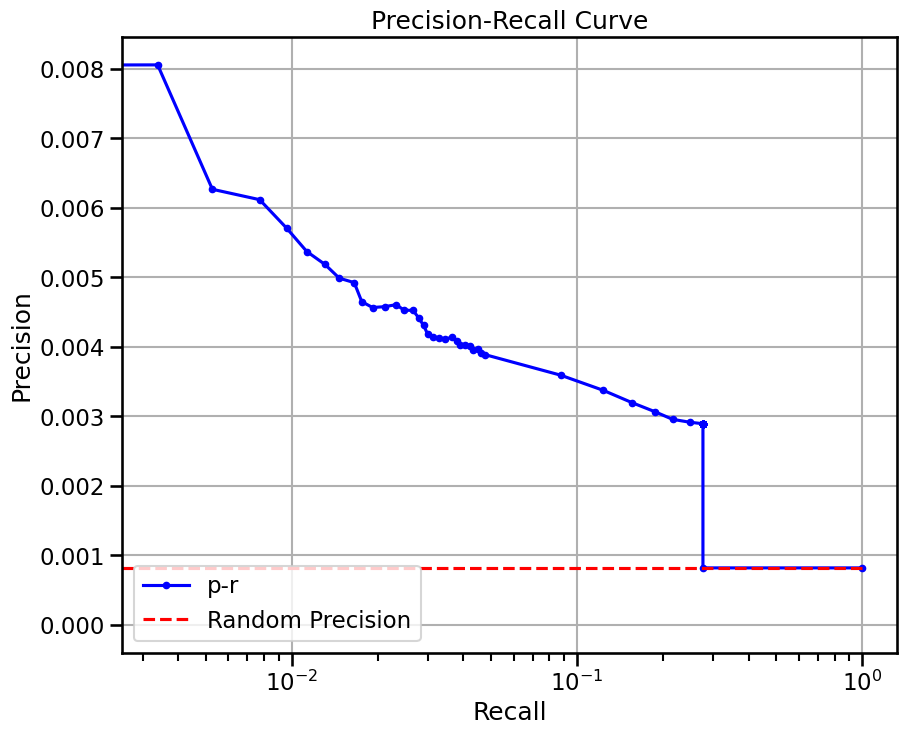

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 499.67 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


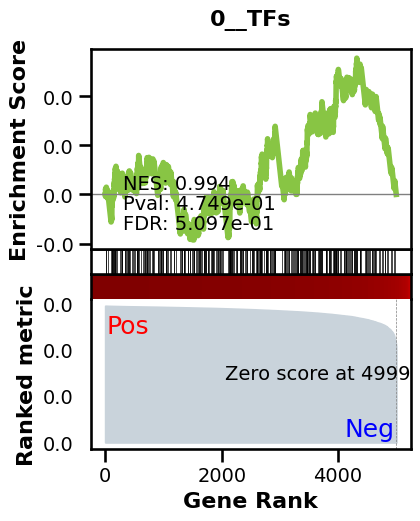

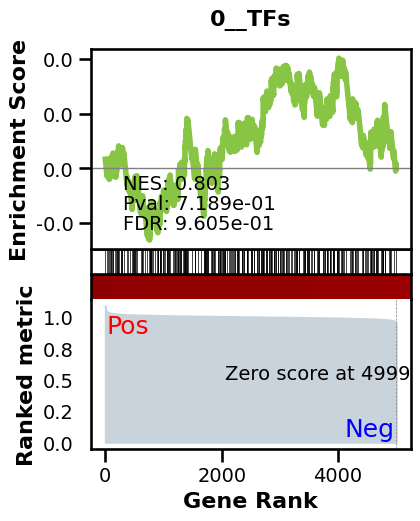

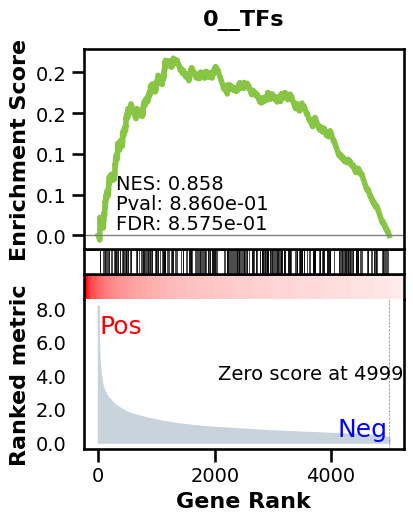

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3599 genes
intersection pct: 0.7198
precision:  0.0008460369171669179 
recall:  0.8966199039638452 
random precision: 0.0008202049825155249



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 42.41it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.78it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.32it/s]


 16%|█▌        | 20/128 [00:00<00:02, 42.83it/s]


 20%|█▉        | 25/128 [00:00<00:02, 42.57it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.09it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.75it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.31it/s]


 35%|███▌      | 45/128 [00:01<00:01, 44.42it/s]


 39%|███▉      | 50/128 [00:01<00:01, 44.75it/s]


 43%|████▎     | 55/128 [00:01<00:01, 44.94it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.64it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.44it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.35it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.29it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 44.37it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.50it/s]


 70%|███████   | 90/128 [00:02<00:00, 44.53it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.58it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.63it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.64it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.67it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.69it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.70it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.69it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 44.27it/s]

Average Precision (AP):  0.0009088485380836262
Area Under Precision-Recall Curve (AUPRC):  0.0009033897500002946


EPR: 2.531766419689667


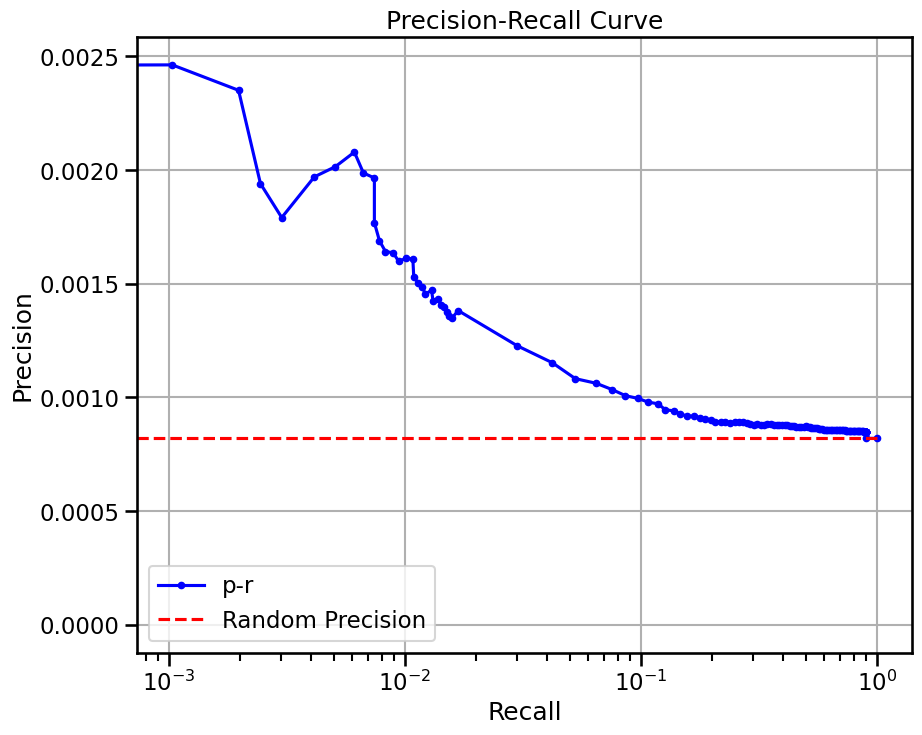

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 87.91 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


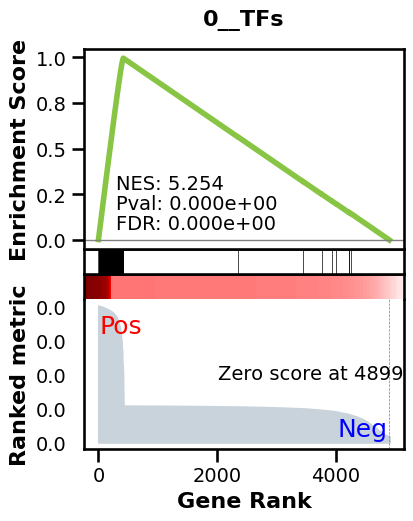

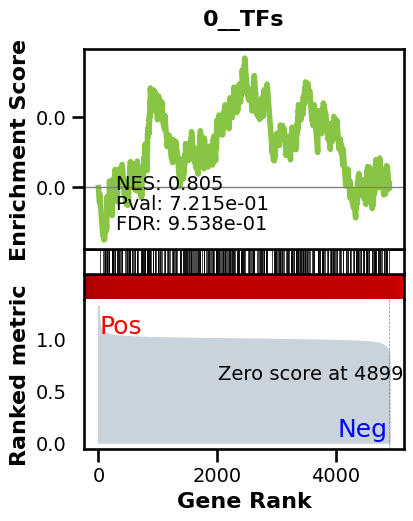

_________________________________________
TF specific enrichment


found some significant results for  3.3333333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3301 genes
intersection pct: 0.6736734693877551
precision:  0.002276388800244465 
recall:  0.2783822138126774 
random precision: 0.0007762569652905915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.93it/s]


  9%|▉         | 12/128 [00:00<00:02, 57.09it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.99it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.77it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.88it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.99it/s]


 33%|███▎      | 42/128 [00:00<00:01, 57.02it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.95it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.84it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.77it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.71it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.52it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.38it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.32it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.27it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.16it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.01it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.71it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.43it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.26it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.25it/s]

Average Precision (AP):  0.0014058635006029784
Area Under Precision-Recall Curve (AUPRC):  0.0011875890331155957
EPR: 5.213561399419744


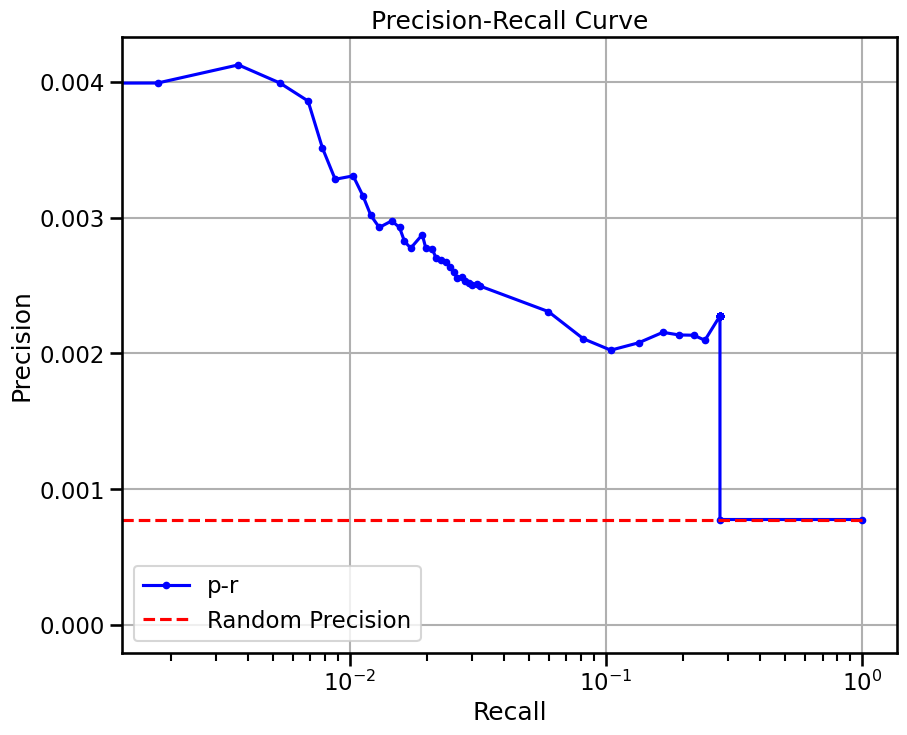

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 304.70 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


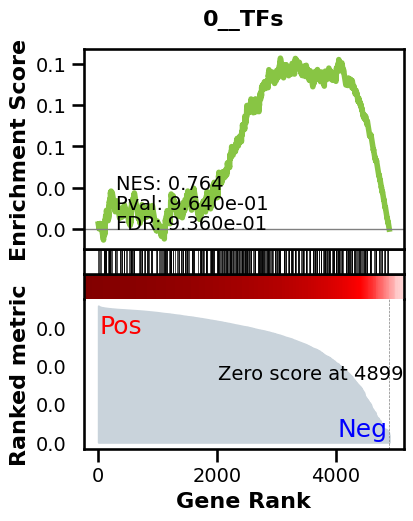

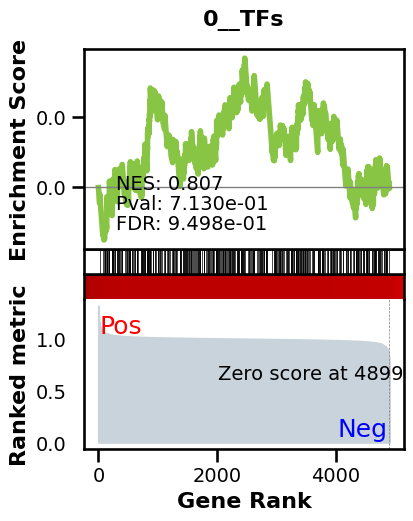

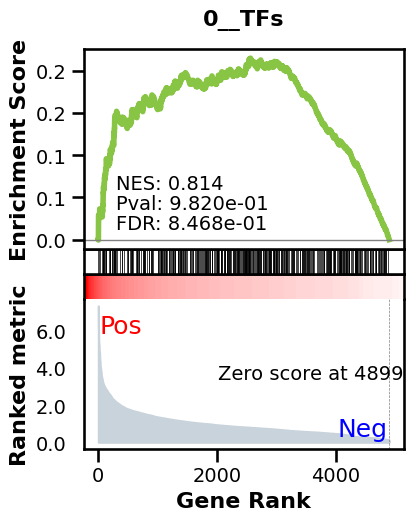

_________________________________________
TF specific enrichment


found some significant results for  6.666666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3301 genes
intersection pct: 0.6736734693877551
precision:  0.0008131338730745496 
recall:  0.6279564806054873 
random precision: 0.0007762569652905915



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 46.08it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.91it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.89it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.89it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.88it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.87it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.86it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.64it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.46it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.33it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.17it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.10it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.15it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.14it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.11it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.08it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 44.87it/s]


 70%|███████   | 90/128 [00:01<00:00, 44.95it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 44.96it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 44.97it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 44.82it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 44.83it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 44.83it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 44.84it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 44.87it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.18it/s]

Average Precision (AP):  0.0008635627538803914
Area Under Precision-Recall Curve (AUPRC):  0.0008548266886775539


EPR: 1.830500989493351


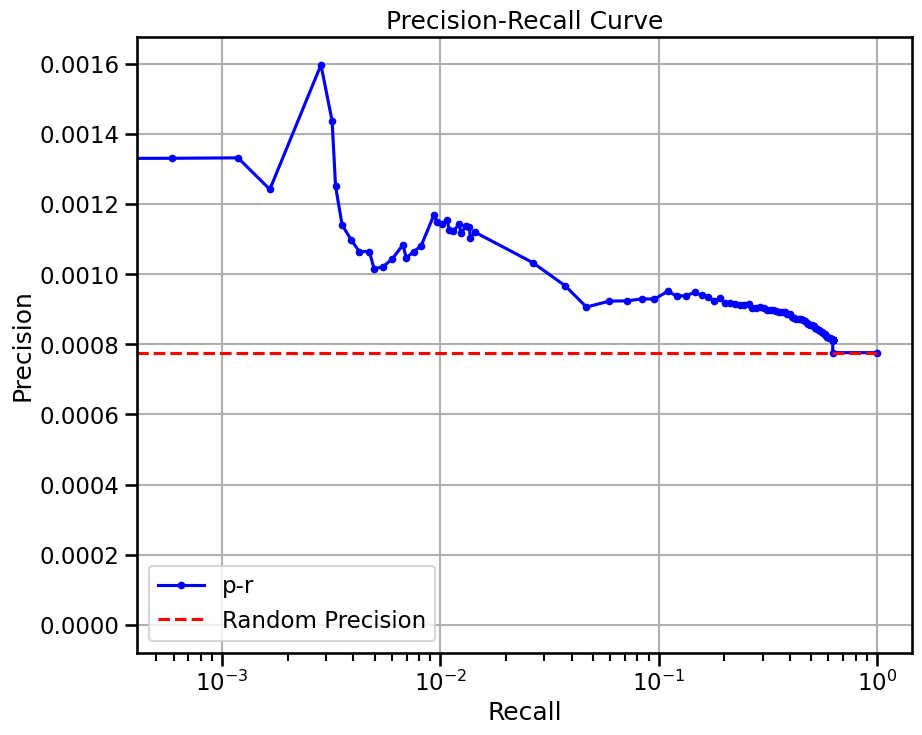

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 113.32 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


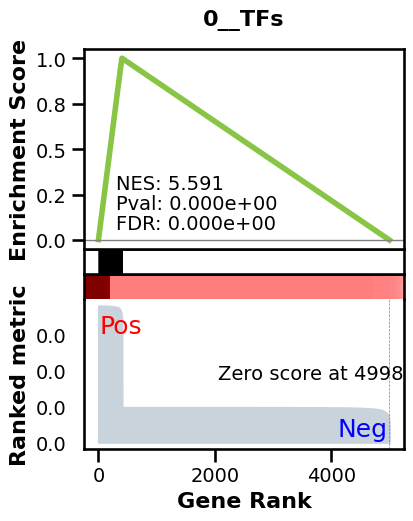

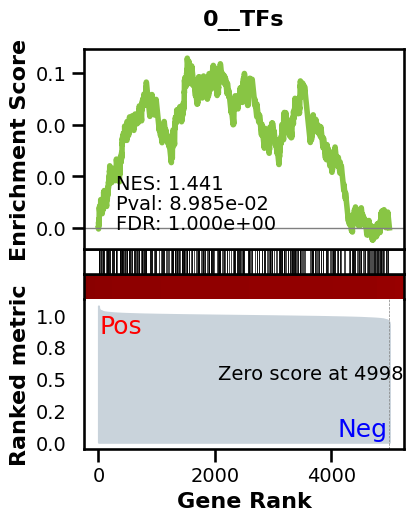

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3520 genes
intersection pct: 0.7041408281656332
precision:  0.001692654903569963 
recall:  0.23766654663305725 
random precision: 0.0006725664574130047



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 48.77it/s]


  8%|▊         | 10/128 [00:00<00:02, 48.70it/s]


 12%|█▏        | 15/128 [00:00<00:02, 48.70it/s]


 16%|█▌        | 20/128 [00:00<00:02, 48.64it/s]


 20%|█▉        | 25/128 [00:00<00:02, 48.62it/s]


 23%|██▎       | 30/128 [00:00<00:02, 48.62it/s]


 27%|██▋       | 35/128 [00:00<00:01, 48.61it/s]


 31%|███▏      | 40/128 [00:00<00:01, 48.62it/s]


 35%|███▌      | 45/128 [00:00<00:01, 48.60it/s]


 39%|███▉      | 50/128 [00:01<00:01, 48.61it/s]


 43%|████▎     | 55/128 [00:01<00:01, 48.65it/s]


 47%|████▋     | 60/128 [00:01<00:01, 48.67it/s]


 51%|█████     | 65/128 [00:01<00:01, 48.59it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 48.57it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 48.56it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 48.53it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 48.55it/s]


 70%|███████   | 90/128 [00:01<00:00, 48.60it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 48.57it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 48.60it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 48.57it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 48.58it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 48.56it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 48.55it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 48.53it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 48.57it/s]

Average Precision (AP):  0.001117111743705644
Area Under Precision-Recall Curve (AUPRC):  0.0010088045601104407
EPR: 5.928510463541119


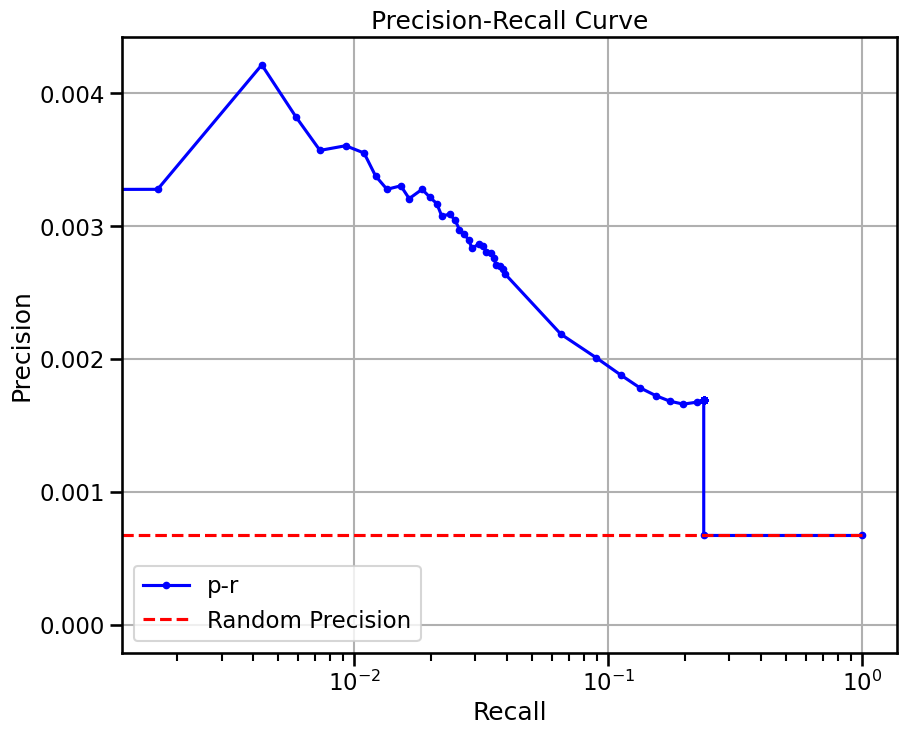

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 449.34 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


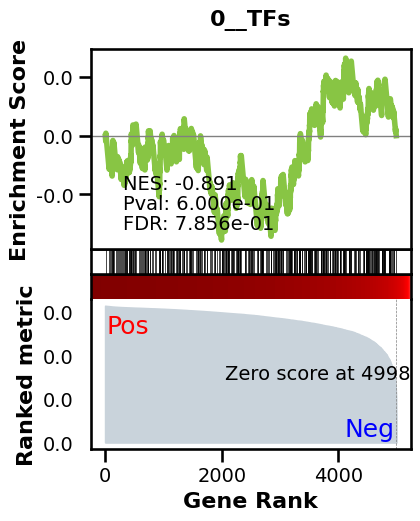

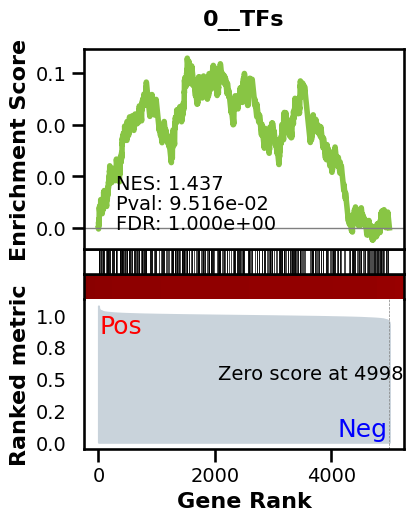

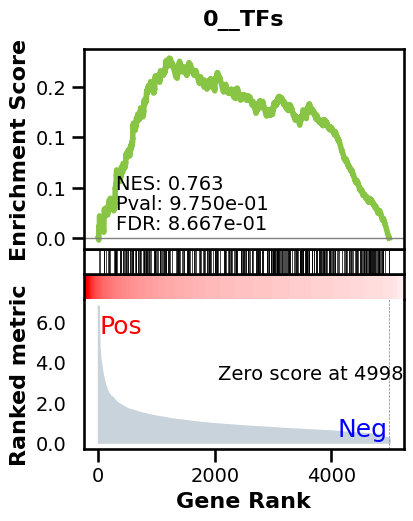

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3520 genes
intersection pct: 0.7041408281656332
precision:  0.0007244898270254258 
recall:  0.8272716360580963 
random precision: 0.0006725664574130047



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 48.88it/s]


  8%|▊         | 10/128 [00:00<00:02, 48.91it/s]


 12%|█▏        | 15/128 [00:00<00:02, 48.81it/s]


 16%|█▌        | 20/128 [00:00<00:02, 48.81it/s]


 20%|█▉        | 25/128 [00:00<00:02, 48.79it/s]


 23%|██▎       | 30/128 [00:00<00:02, 48.72it/s]


 27%|██▋       | 35/128 [00:00<00:01, 48.67it/s]


 31%|███▏      | 40/128 [00:00<00:01, 48.65it/s]


 35%|███▌      | 45/128 [00:00<00:01, 48.67it/s]


 39%|███▉      | 50/128 [00:01<00:01, 48.64it/s]


 43%|████▎     | 55/128 [00:01<00:01, 48.65it/s]


 47%|████▋     | 60/128 [00:01<00:01, 48.64it/s]


 51%|█████     | 65/128 [00:01<00:01, 48.67it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 48.70it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 48.69it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 48.63it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 48.63it/s]


 70%|███████   | 90/128 [00:01<00:00, 48.67it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 48.63it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 48.66it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 48.65it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 48.65it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 48.68it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.90it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 48.29it/s]

Average Precision (AP):  0.0007701155597012494
Area Under Precision-Recall Curve (AUPRC):  0.000765271013181571
EPR: 1.2497164772647238


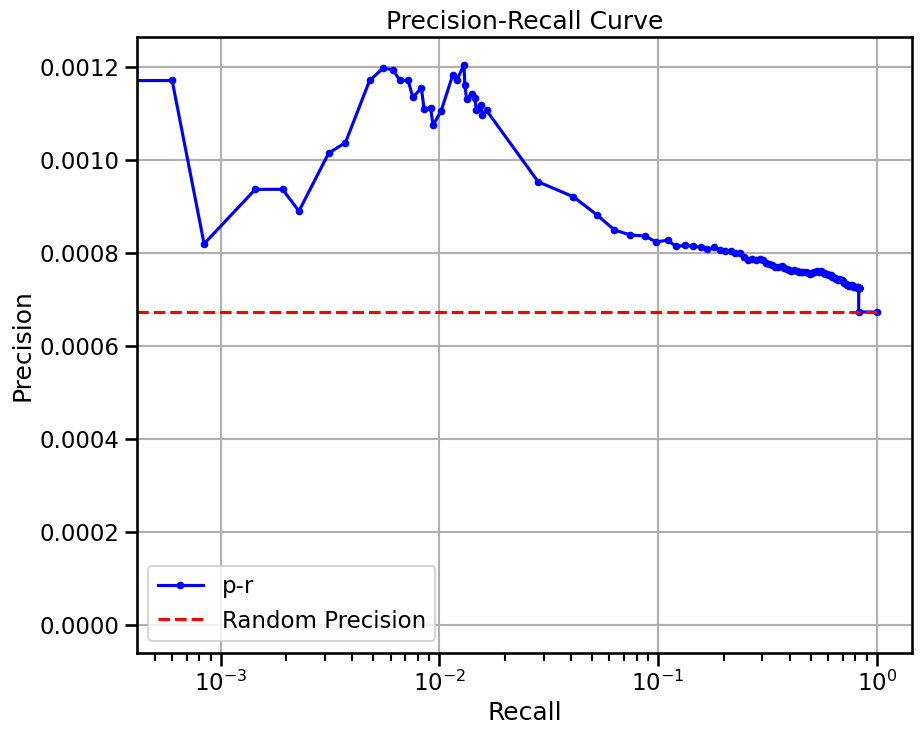

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 127.25 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


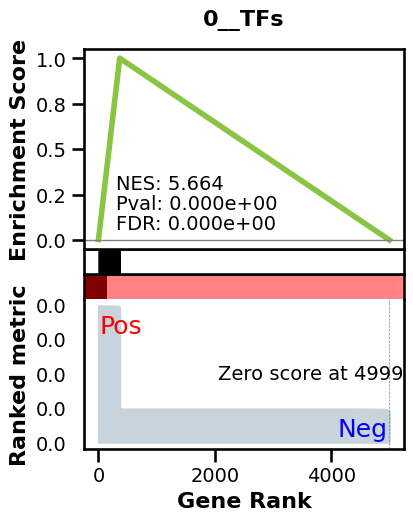

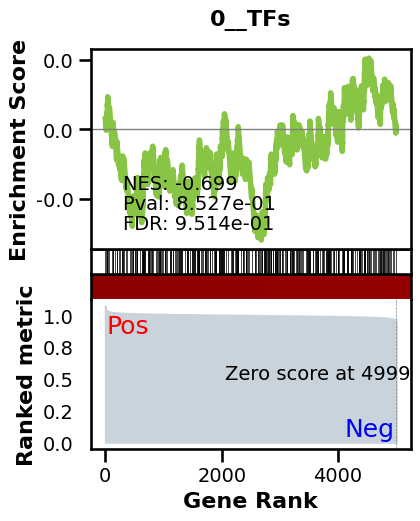

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3522 genes
intersection pct: 0.7044
precision:  0.0028339405611770997 
recall:  0.3138448619712396 
random precision: 0.0007682468505265962



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.61it/s]


  8%|▊         | 10/128 [00:00<00:02, 49.70it/s]


 12%|█▏        | 15/128 [00:00<00:02, 49.52it/s]


 16%|█▌        | 20/128 [00:00<00:02, 49.58it/s]


 20%|█▉        | 25/128 [00:00<00:02, 49.60it/s]


 23%|██▎       | 30/128 [00:00<00:01, 49.63it/s]


 27%|██▋       | 35/128 [00:00<00:01, 49.67it/s]


 31%|███▏      | 40/128 [00:00<00:01, 49.64it/s]


 35%|███▌      | 45/128 [00:00<00:01, 49.65it/s]


 39%|███▉      | 50/128 [00:01<00:01, 49.67it/s]


 43%|████▎     | 55/128 [00:01<00:01, 49.70it/s]


 47%|████▋     | 60/128 [00:01<00:01, 49.76it/s]


 51%|█████     | 65/128 [00:01<00:01, 49.75it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 49.76it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 49.72it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 49.72it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 49.68it/s]


 70%|███████   | 90/128 [00:01<00:00, 49.66it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 49.71it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 49.71it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 49.67it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 49.70it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 49.66it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 49.66it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 49.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 49.66it/s]

Average Precision (AP):  0.0019362066810593422
Area Under Precision-Recall Curve (AUPRC):  0.0016766609964580148
EPR: 7.17190128166749


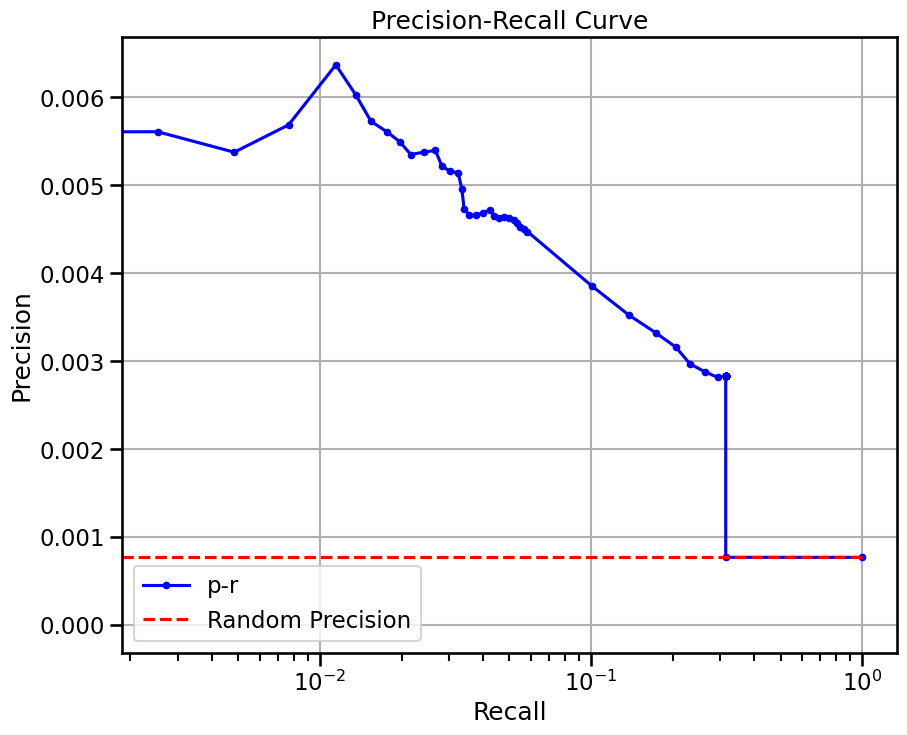

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 495.70 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


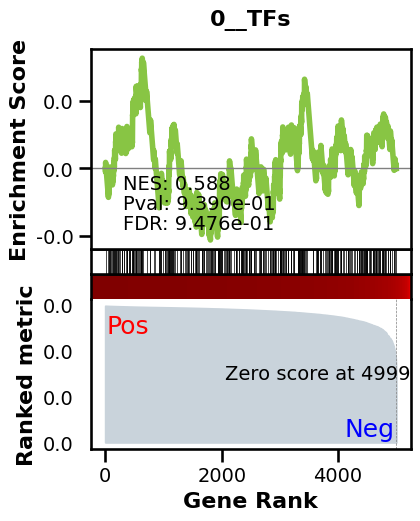

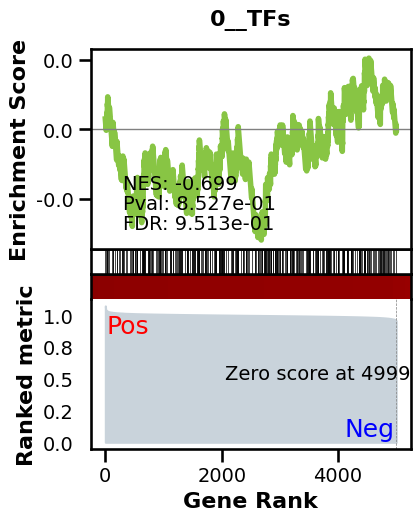

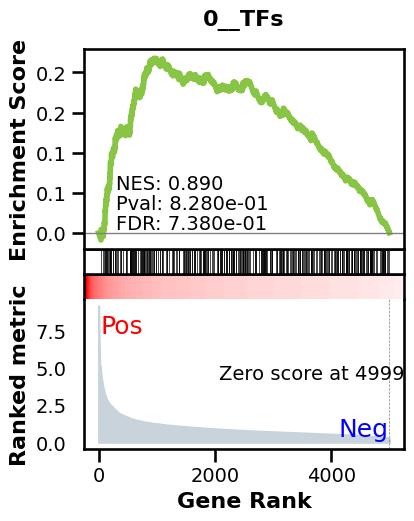

_________________________________________
TF specific enrichment


found some significant results for  3.0303030303030303 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3522 genes
intersection pct: 0.7044
precision:  0.0007998750437379989 
recall:  0.8885273433399811 
random precision: 0.0007682468505265962



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 48.82it/s]


  8%|▊         | 10/128 [00:00<00:02, 48.75it/s]


 12%|█▏        | 15/128 [00:00<00:02, 48.74it/s]


 16%|█▌        | 20/128 [00:00<00:02, 48.73it/s]


 20%|█▉        | 25/128 [00:00<00:02, 48.70it/s]


 23%|██▎       | 30/128 [00:00<00:02, 48.67it/s]


 27%|██▋       | 35/128 [00:00<00:01, 48.67it/s]


 31%|███▏      | 40/128 [00:00<00:01, 48.60it/s]


 35%|███▌      | 45/128 [00:00<00:01, 48.62it/s]


 39%|███▉      | 50/128 [00:01<00:01, 48.68it/s]


 43%|████▎     | 55/128 [00:01<00:01, 48.67it/s]


 47%|████▋     | 60/128 [00:01<00:01, 48.66it/s]


 51%|█████     | 65/128 [00:01<00:01, 48.63it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 48.63it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 48.61it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 48.61it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 48.65it/s]


 70%|███████   | 90/128 [00:01<00:00, 48.62it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 47.87it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 48.08it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 48.28it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 48.35it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 48.43it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 48.49it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 48.51it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 48.53it/s]

Average Precision (AP):  0.0008651608820332343
Area Under Precision-Recall Curve (AUPRC):  0.0008617622728342694


EPR: 1.9154953675954216


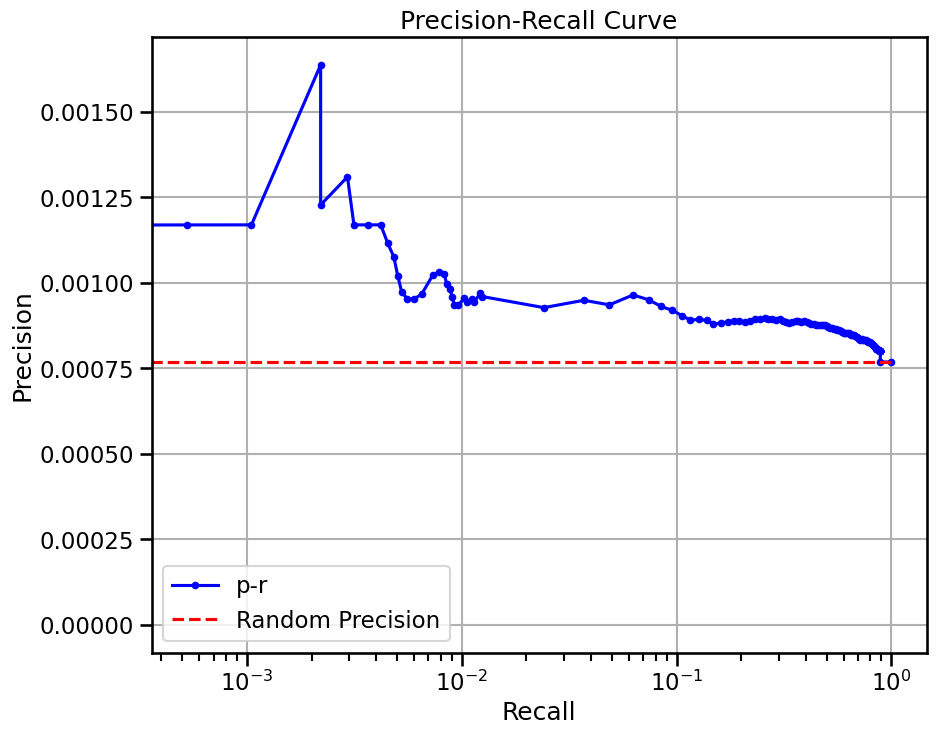

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 125.75 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


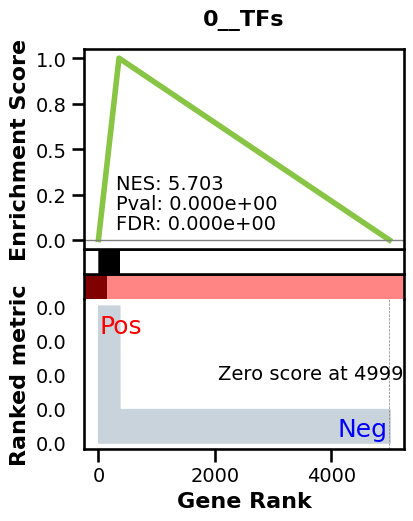

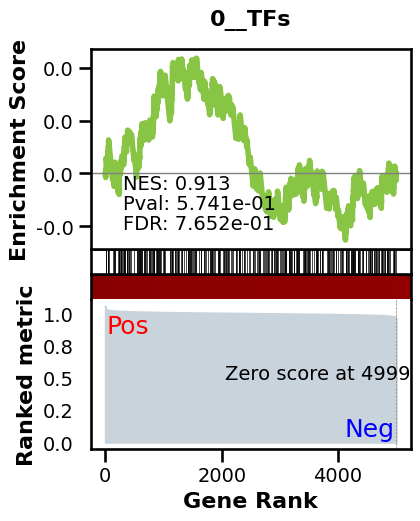

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3550 genes
intersection pct: 0.71
precision:  0.0037748608678299816 
recall:  0.31647432421965765 
random precision: 0.0010247679370106238



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 47.78it/s]


  8%|▊         | 10/128 [00:00<00:02, 47.74it/s]


 12%|█▏        | 15/128 [00:00<00:02, 47.67it/s]


 16%|█▌        | 20/128 [00:00<00:02, 47.63it/s]


 20%|█▉        | 25/128 [00:00<00:02, 47.62it/s]


 23%|██▎       | 30/128 [00:00<00:02, 47.58it/s]


 27%|██▋       | 35/128 [00:00<00:01, 47.58it/s]


 31%|███▏      | 40/128 [00:00<00:01, 47.45it/s]


 35%|███▌      | 45/128 [00:00<00:01, 47.52it/s]


 39%|███▉      | 50/128 [00:01<00:01, 47.54it/s]


 43%|████▎     | 55/128 [00:01<00:01, 47.57it/s]


 47%|████▋     | 60/128 [00:01<00:01, 47.59it/s]


 51%|█████     | 65/128 [00:01<00:01, 47.56it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 47.55it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 47.55it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 47.57it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 47.56it/s]


 70%|███████   | 90/128 [00:01<00:00, 47.54it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 47.54it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 47.55it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 47.56it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 47.54it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 47.53it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.54it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 47.54it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 47.55it/s]

Average Precision (AP):  0.002530219966984028
Area Under Precision-Recall Curve (AUPRC):  0.002141224468265775
EPR: 7.738734369677281


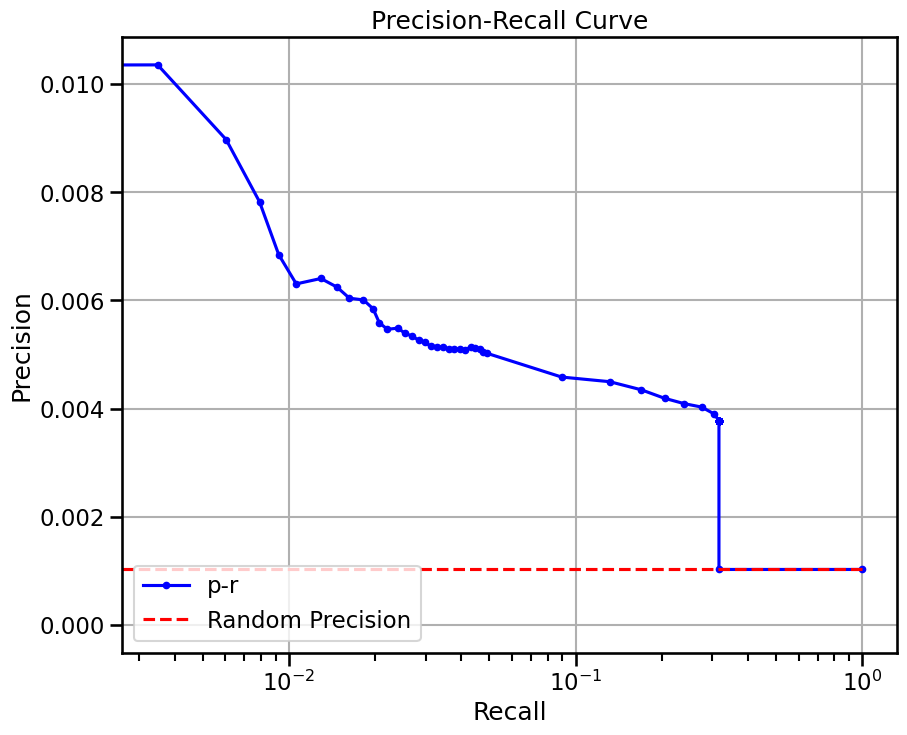

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 505.56 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


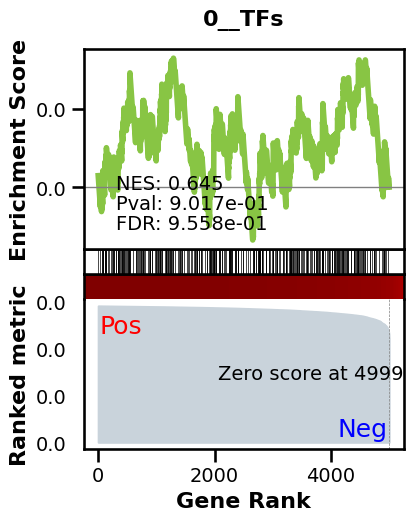

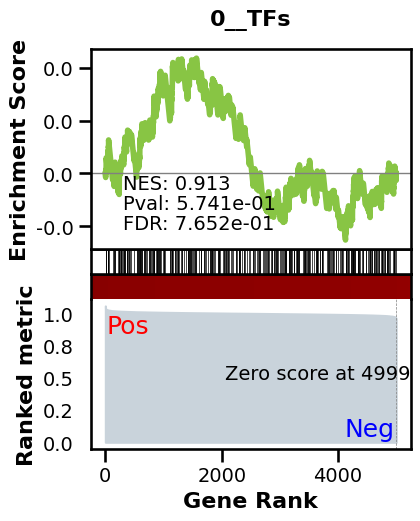

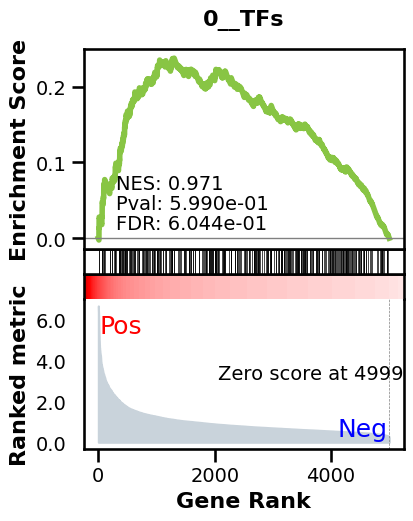

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3550 genes
intersection pct: 0.71
precision:  0.0010528294558423729 
recall:  0.9178994655719929 
random precision: 0.0010247679370106238



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 47.21it/s]


  8%|▊         | 10/128 [00:00<00:02, 47.20it/s]


 12%|█▏        | 15/128 [00:00<00:02, 47.17it/s]


 16%|█▌        | 20/128 [00:00<00:02, 47.07it/s]


 20%|█▉        | 25/128 [00:00<00:02, 47.00it/s]


 23%|██▎       | 30/128 [00:00<00:02, 47.02it/s]


 27%|██▋       | 35/128 [00:00<00:01, 47.05it/s]


 31%|███▏      | 40/128 [00:00<00:01, 47.06it/s]


 35%|███▌      | 45/128 [00:00<00:01, 47.06it/s]


 39%|███▉      | 50/128 [00:01<00:01, 47.07it/s]


 43%|████▎     | 55/128 [00:01<00:01, 47.07it/s]


 47%|████▋     | 60/128 [00:01<00:01, 47.05it/s]


 51%|█████     | 65/128 [00:01<00:01, 47.03it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 47.03it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 47.05it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 47.05it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 47.05it/s]


 70%|███████   | 90/128 [00:01<00:00, 47.02it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.98it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.97it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.97it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 46.97it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 47.01it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.02it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 47.03it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 47.02it/s]

Average Precision (AP):  0.0011551057661181637
Area Under Precision-Recall Curve (AUPRC):  0.0011510450548536063
EPR: 2.273350855776954


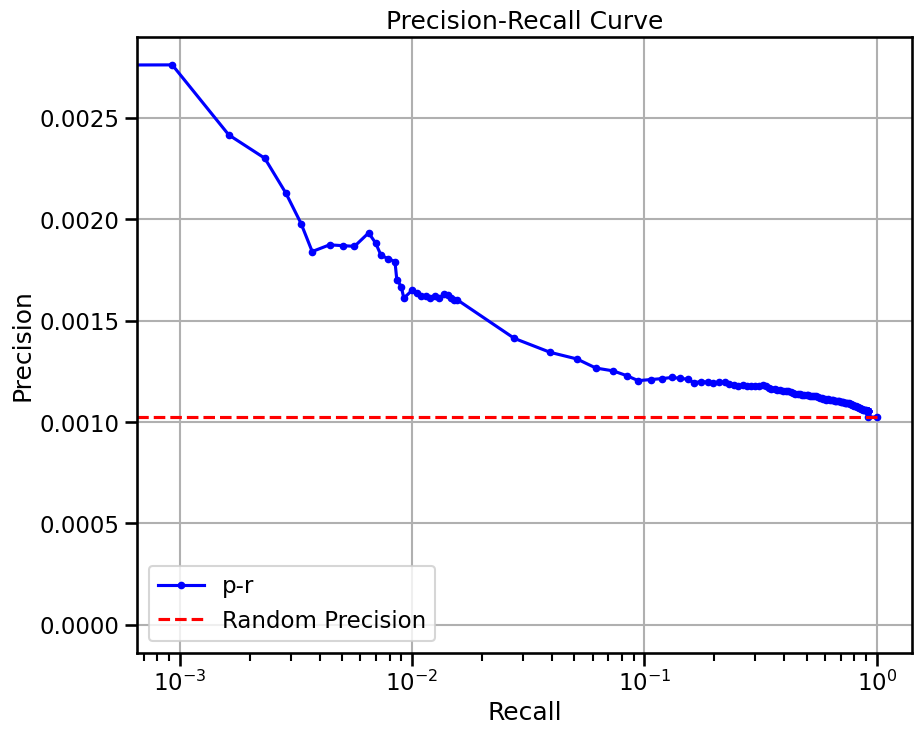

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 86.07 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


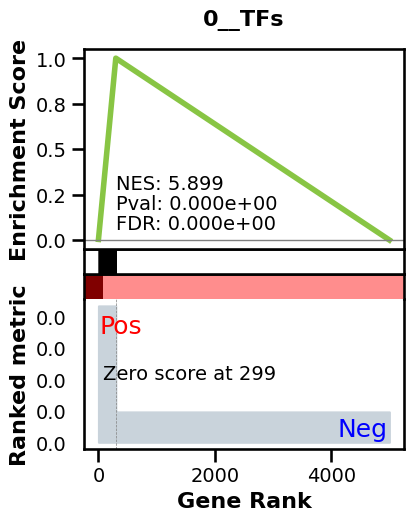

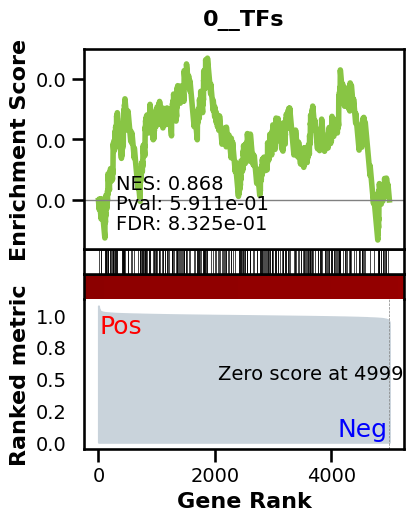

_________________________________________
TF specific enrichment


found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3676 genes
intersection pct: 0.7352
precision:  0.0031297770073280278 
recall:  0.23127086406334912 
random precision: 0.0009534912985868993



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.52it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.51it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.52it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.49it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.38it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.34it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.34it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.33it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.32it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.34it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.34it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.30it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.27it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.30it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.32it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.36it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.35it/s]


 70%|███████   | 90/128 [00:02<00:00, 42.85it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.02it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.15it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.22it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.28it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.28it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.30it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.31it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.28it/s]

Average Precision (AP):  0.0018657898002010147
Area Under Precision-Recall Curve (AUPRC):  0.001661671517779358
EPR: 5.418919553433728


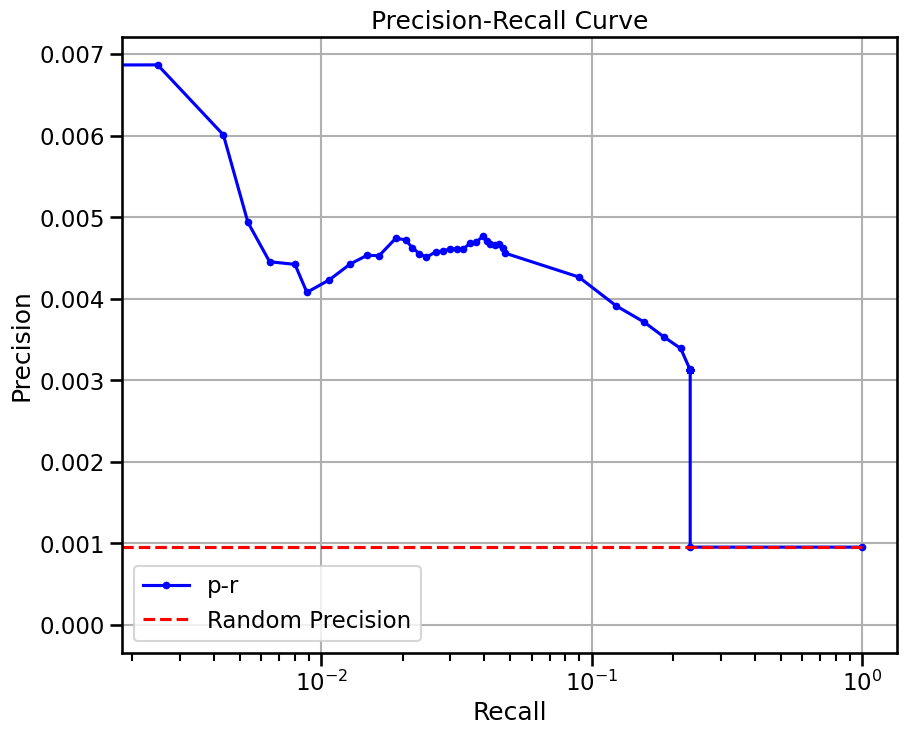

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 277.29 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


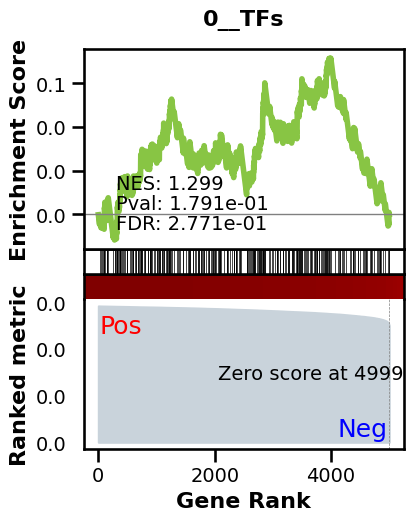

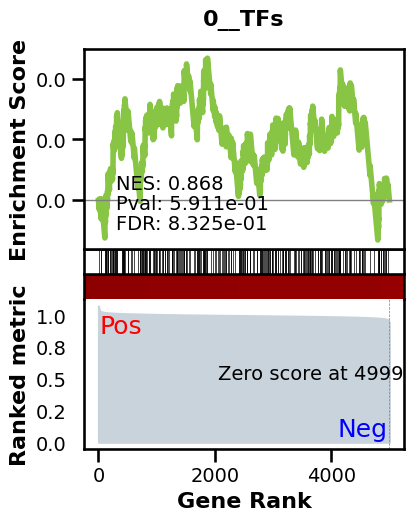

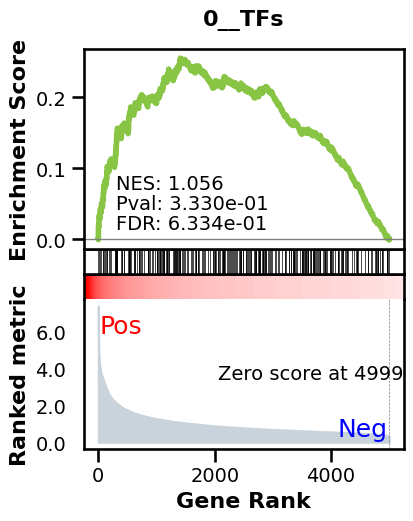

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3676 genes
intersection pct: 0.7352
precision:  0.0009829920747980087 
recall:  0.889371943172114 
random precision: 0.0009534912985868993



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.40it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.32it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.29it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.30it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.31it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.29it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.24it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.25it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.21it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.23it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.24it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.24it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.22it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.22it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.23it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.24it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.19it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.17it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.19it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.21it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.19it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.17it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.20it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.21it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.20it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.22it/s]

Average Precision (AP):  0.0010371891461991999
Area Under Precision-Recall Curve (AUPRC):  0.0010340534412998756


EPR: 1.7121503438150776


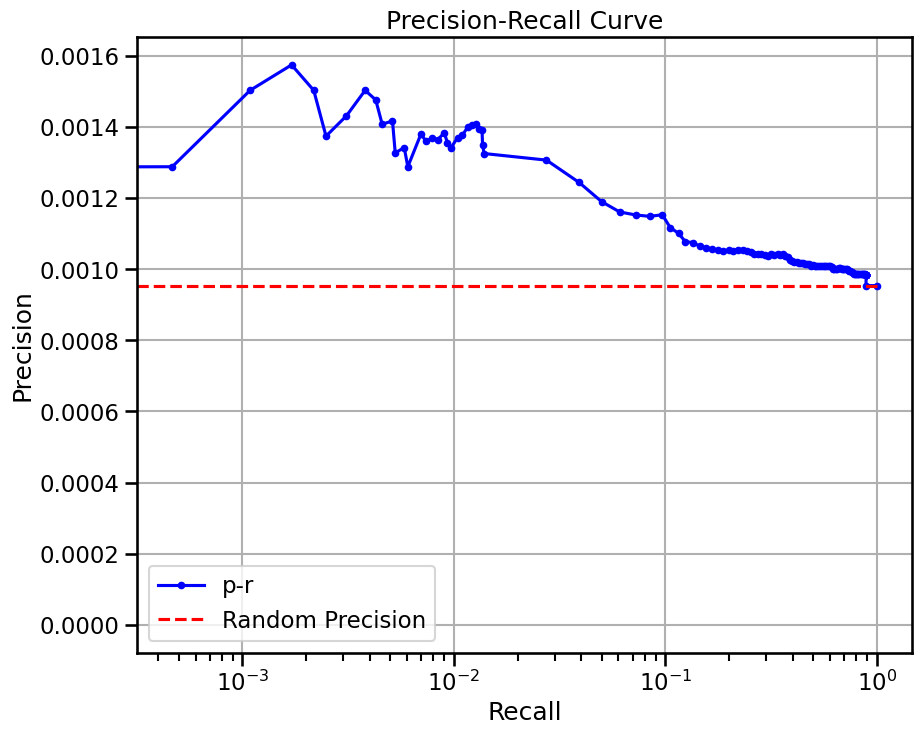

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 46.27 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


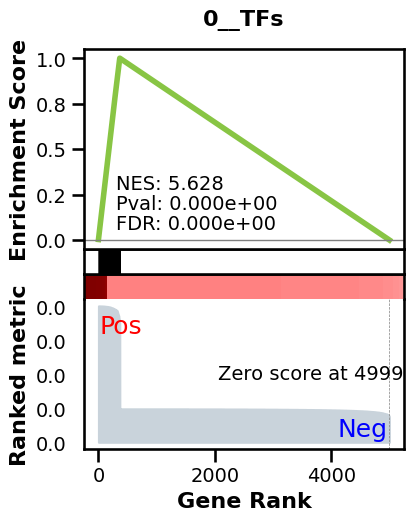

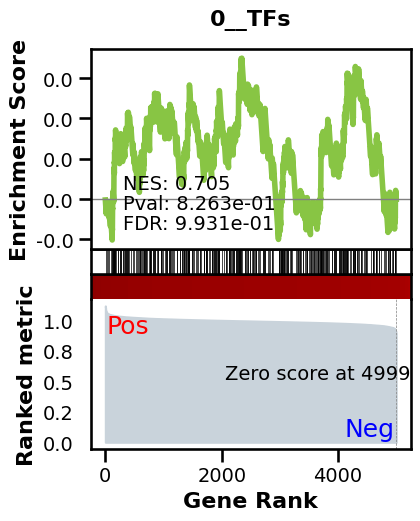

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3645 genes
intersection pct: 0.729
precision:  0.006713916274942108 
recall:  0.4073080967402734 
random precision: 0.0014319722820759532



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 42.63it/s]


  8%|▊         | 10/128 [00:00<00:02, 42.53it/s]


 12%|█▏        | 15/128 [00:00<00:02, 42.51it/s]


 16%|█▌        | 20/128 [00:00<00:02, 42.53it/s]


 20%|█▉        | 25/128 [00:00<00:02, 42.51it/s]


 23%|██▎       | 30/128 [00:00<00:02, 42.46it/s]


 27%|██▋       | 35/128 [00:00<00:02, 42.47it/s]


 31%|███▏      | 40/128 [00:00<00:02, 42.46it/s]


 35%|███▌      | 45/128 [00:01<00:01, 42.48it/s]


 39%|███▉      | 50/128 [00:01<00:01, 42.47it/s]


 43%|████▎     | 55/128 [00:01<00:01, 42.46it/s]


 47%|████▋     | 60/128 [00:01<00:01, 42.47it/s]


 51%|█████     | 65/128 [00:01<00:01, 42.46it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 42.44it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 42.45it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 42.46it/s]


 66%|██████▋   | 85/128 [00:02<00:01, 42.45it/s]


 70%|███████   | 90/128 [00:02<00:00, 42.47it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 42.47it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 42.29it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 42.29it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 42.35it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 42.39it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 42.40it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 42.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:03<00:00, 42.44it/s]

Average Precision (AP):  0.004594010885875984
Area Under Precision-Recall Curve (AUPRC):  0.004020970731920675
EPR: 8.205777149087305


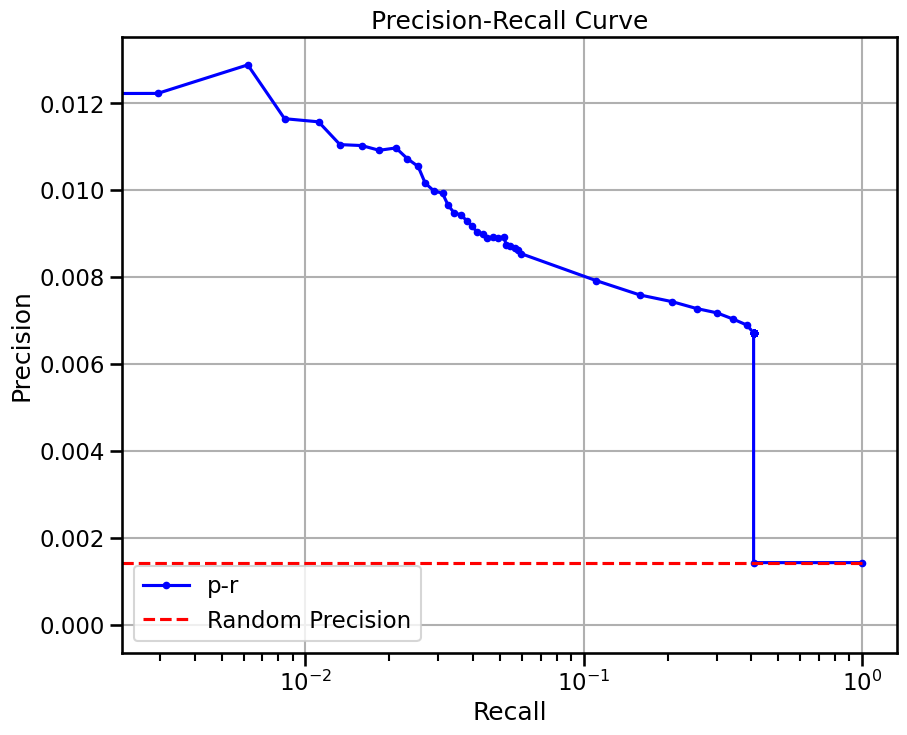

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 89.43 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


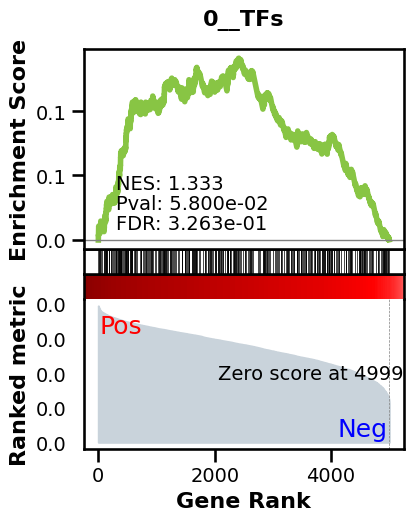

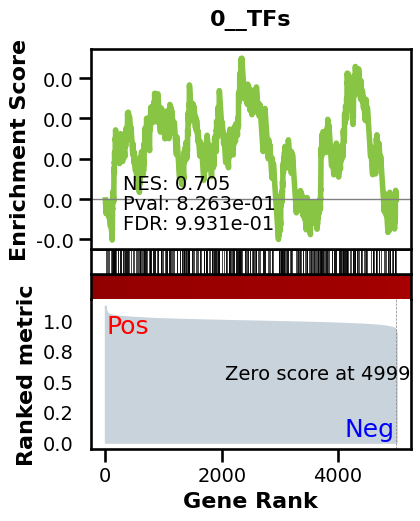

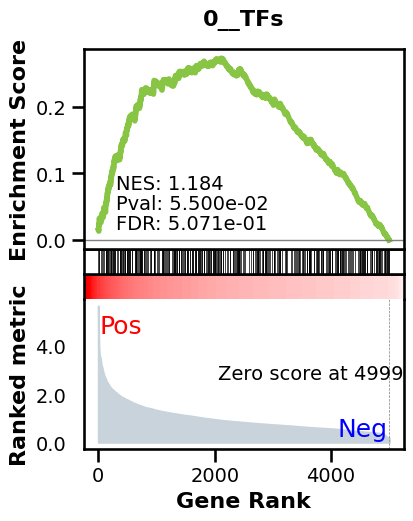

_________________________________________
TF specific enrichment


found some significant results for  18.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3645 genes
intersection pct: 0.729
precision:  0.0016805073787878036 
recall:  0.5520504731861199 
random precision: 0.0014319722820759532



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.52it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.48it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.15it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.23it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.32it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.35it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.36it/s]


 31%|███▏      | 40/128 [00:00<00:02, 43.36it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.36it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.38it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.39it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.38it/s]


 51%|█████     | 65/128 [00:01<00:01, 43.38it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 43.39it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 43.38it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.39it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.40it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.38it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.38it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.40it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.39it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.38it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.36it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.26it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.27it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.34it/s]

Average Precision (AP):  0.0016350459008860655
Area Under Precision-Recall Curve (AUPRC):  0.0015951252115882142


EPR: 1.8402096476721979


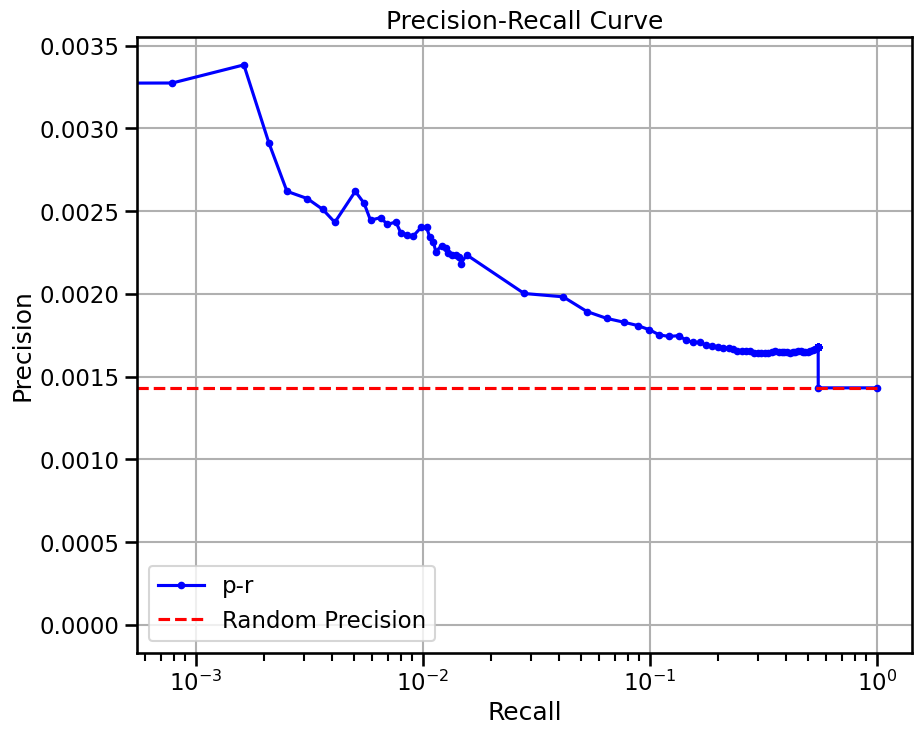

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 46.39 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


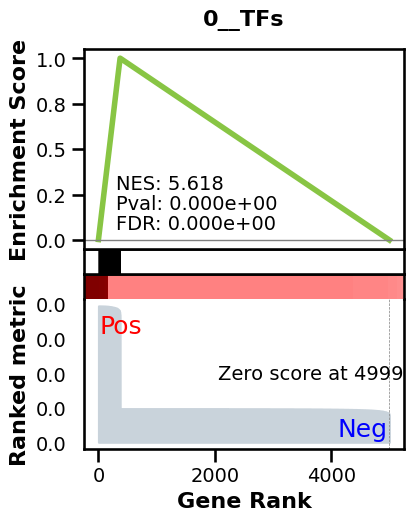

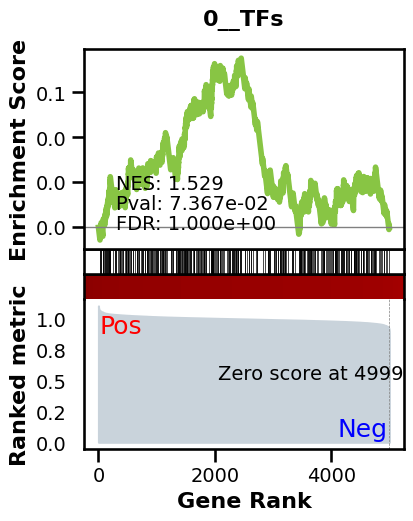

_________________________________________
TF specific enrichment


found some significant results for  6.0606060606060606 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3764 genes
intersection pct: 0.7528
precision:  0.009172800651979781 
recall:  0.4483050847457627 
random precision: 0.0018328243880301035



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 38.57it/s]


  6%|▋         | 8/128 [00:00<00:03, 38.37it/s]


  9%|▉         | 12/128 [00:00<00:03, 38.38it/s]


 12%|█▎        | 16/128 [00:00<00:02, 38.34it/s]


 16%|█▌        | 20/128 [00:00<00:02, 38.37it/s]


 19%|█▉        | 24/128 [00:00<00:02, 38.33it/s]


 22%|██▏       | 28/128 [00:00<00:02, 38.32it/s]


 25%|██▌       | 32/128 [00:00<00:02, 38.36it/s]


 28%|██▊       | 36/128 [00:00<00:02, 38.34it/s]


 31%|███▏      | 40/128 [00:01<00:02, 38.36it/s]


 34%|███▍      | 44/128 [00:01<00:02, 38.32it/s]


 38%|███▊      | 48/128 [00:01<00:02, 38.30it/s]


 41%|████      | 52/128 [00:01<00:01, 38.28it/s]


 44%|████▍     | 56/128 [00:01<00:01, 38.32it/s]


 47%|████▋     | 60/128 [00:01<00:01, 38.27it/s]


 50%|█████     | 64/128 [00:01<00:01, 38.28it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 38.26it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 38.31it/s]


 59%|█████▉    | 76/128 [00:01<00:01, 38.28it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 38.08it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 38.14it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 38.22it/s]


 72%|███████▏  | 92/128 [00:02<00:00, 38.26it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 38.24it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 38.25it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 38.24it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 38.29it/s]


 88%|████████▊ | 112/128 [00:02<00:00, 38.27it/s]


 91%|█████████ | 116/128 [00:03<00:00, 38.25it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 38.26it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 38.31it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:03<00:00, 38.23it/s]


100%|██████████| 128/128 [00:03<00:00, 38.27it/s]

Average Precision (AP):  0.005921900358817611
Area Under Precision-Recall Curve (AUPRC):  0.00526723802697439
EPR: 6.0575292459258465


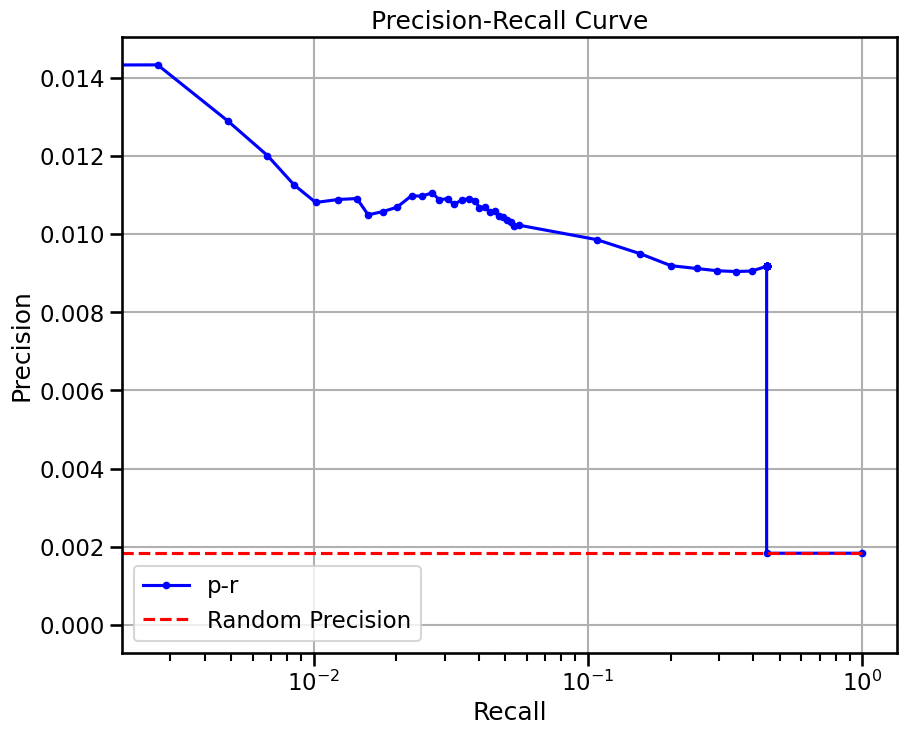

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 94.45 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


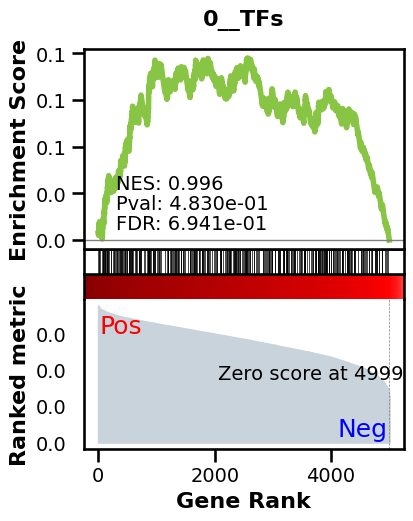

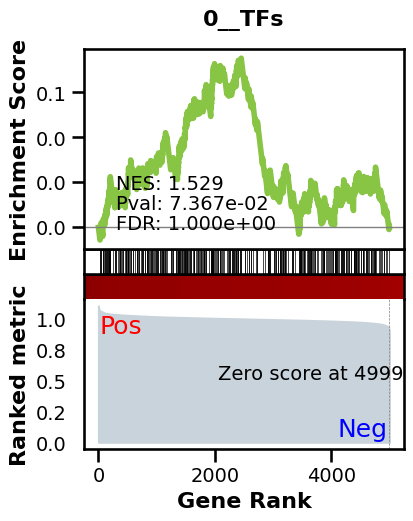

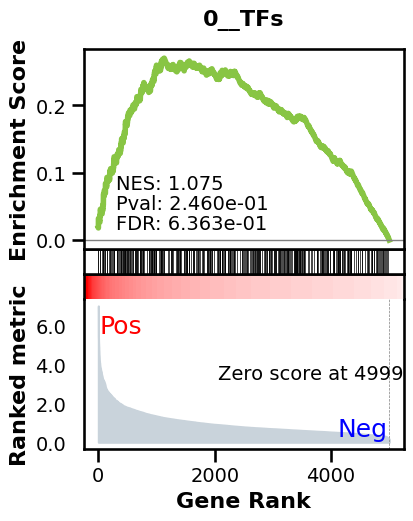

_________________________________________
TF specific enrichment


found some significant results for  3.0303030303030303 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3764 genes
intersection pct: 0.7528
precision:  0.00200694593231592 
recall:  0.5405238828967642 
random precision: 0.0018328243880301035



  0%|          | 0/128 [00:00<?, ?it/s]


  3%|▎         | 4/128 [00:00<00:03, 38.28it/s]


  6%|▋         | 8/128 [00:00<00:03, 38.17it/s]


  9%|▉         | 12/128 [00:00<00:03, 38.14it/s]


 12%|█▎        | 16/128 [00:00<00:02, 38.13it/s]


 16%|█▌        | 20/128 [00:00<00:02, 38.13it/s]


 19%|█▉        | 24/128 [00:00<00:02, 38.12it/s]


 22%|██▏       | 28/128 [00:00<00:02, 38.10it/s]


 25%|██▌       | 32/128 [00:00<00:02, 38.10it/s]


 28%|██▊       | 36/128 [00:00<00:02, 38.07it/s]


 31%|███▏      | 40/128 [00:01<00:02, 38.08it/s]


 34%|███▍      | 44/128 [00:01<00:02, 38.09it/s]


 38%|███▊      | 48/128 [00:01<00:02, 37.94it/s]


 41%|████      | 52/128 [00:01<00:02, 37.92it/s]


 44%|████▍     | 56/128 [00:01<00:01, 37.98it/s]


 47%|████▋     | 60/128 [00:01<00:01, 37.99it/s]


 50%|█████     | 64/128 [00:01<00:01, 38.02it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 38.05it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 38.06it/s]


 59%|█████▉    | 76/128 [00:01<00:01, 38.06it/s]


 62%|██████▎   | 80/128 [00:02<00:01, 38.04it/s]


 66%|██████▌   | 84/128 [00:02<00:01, 38.05it/s]


 69%|██████▉   | 88/128 [00:02<00:01, 38.06it/s]


 72%|███████▏  | 92/128 [00:02<00:00, 38.02it/s]


 75%|███████▌  | 96/128 [00:02<00:00, 38.01it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 38.03it/s]


 81%|████████▏ | 104/128 [00:02<00:00, 38.00it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 37.99it/s]


 88%|████████▊ | 112/128 [00:02<00:00, 37.97it/s]


 91%|█████████ | 116/128 [00:03<00:00, 37.97it/s]


 94%|█████████▍| 120/128 [00:03<00:00, 38.02it/s]


 97%|█████████▋| 124/128 [00:03<00:00, 38.03it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:03<00:00, 37.99it/s]


100%|██████████| 128/128 [00:03<00:00, 38.03it/s]

Average Precision (AP):  0.0019943662313559444
Area Under Precision-Recall Curve (AUPRC):  0.0019516706274589587
EPR: 1.4314254872626981


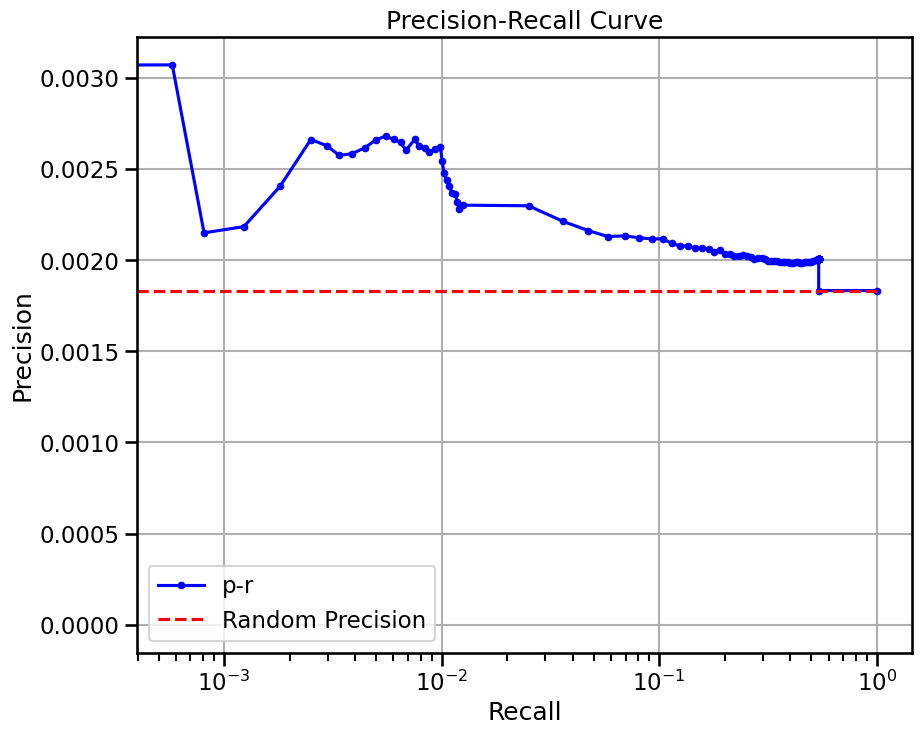

In [6]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
metrics = {}
shapes = []
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(to_use)]
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(genie_grn.shape[1])

In [7]:
metrics

{'genie3_tf_retinal rod cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Gamma (PP) cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Rod photoreceptor cells',
   'celltype.gmt__Myocytes',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Enteroendocrine cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Alpha cells'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.005248157931322119,
  'recall': 0.4967105263157895,
  'rand_precision': 0.0007671537083301789,
  'auprc': 0.005122339444056498,
  'ap': 0.005998196103599925,
  'epr': 22.128779320141835},
 'genie3_retinal rod cell': {'enriched_terms_Central': ['celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Rod photoreceptor cells'],
  'TF_enr': False,
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.0007532323628463468,
  'recall': 0.7960526315789

In [8]:
shapes

[994, 5000, 5000, 4900, 4999, 5000, 5000, 5000, 5000, 5000]

In [9]:
True
True
True
True
True
True
True
True
False
True
False
True
False
False
False
True
False
True
True
False

False

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC      RAND    TF_targ  TF_enr  \
0         retinal rod cell  22.128779  0.005122  0.000767   0.000000    True   
1         retinal rod cell  13.101345  0.001272  0.000767   0.000000   False   
2             Mueller cell  11.301529  0.003959  0.001377   1.724138    True   
3             Mueller cell   2.165370  0.001546  0.001377   6.896552   False   
4            amacrine cell   7.893858  0.001559  0.000820   0.000000    True   
5            amacrine cell   2.531766  0.000903  0.000820   3.571429   False   
6          ON-bipolar cell   5.213561  0.001188  0.000776   3.333333    True   
7          ON-bipolar cell   1.830501  0.000855  0.000776   6.666667   False   
8         rod bipolar cell   5.928510  0.001009  0.000673   7.142857    True   
9         rod bipolar cell   1.249716  0.000765  0.000673   3.571429   False   
10       retinal cone cell   7.171901  0.001677  0.000768   9.090909    True   
11       retinal cone cell   1.915495  0.000862  0.000768   3.030303   False   
12  retina horizontal cell   7.738734  0.002141  0.001025   7.692308    True   
13  retina horizontal cell   2.273351  0.001151  0.001025   7.692308   False   
14   retinal ganglion cell   5.418920  0.001662  0.000953   4.166667    True   
15   retinal ganglion cell   1.712150  0.001034  0.000953   0.000000   False   
16               astrocyte   8.205777  0.004021  0.001432   0.000000    True   
17               astrocyte   1.840210  0.001595  0.001432  18.000000   False   
18         microglial cell   6.057529  0.005267  0.001833   6.060606    True   
19         microglial cell   1.431425  0.001952  0.001833   3.030303   False   

    TF_only  
0      True  
1     False  
2      True  
3     False  
4      True  
5     False  
6      True  
7     False  
8      True  
9     False  
10     True  
11    False  
12     True  
13    False  
14     True  
15    False  
16     True  
17    False  
18     True  
19    False